# WeatherPy - Kolencherry
----

#### Note
* I didn't push the api_keys file to github.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#units 
units = 'imperial'

#empty lists for future columns
city_list = []
lats = []
long = []
temp = []
wind = []
humid = []
cloud = []
country = []
pressure = []

#set count to zero for counter to use when printing
count = 0

for city in cities:
    #city number 
    count += 1
    
    try: 
        #generate url and execute get request
        query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q={city}"
        response = requests.get(query_url).json()
        
        #append latitude, longitude, wind, temperature, humidity, visibility, and country
        lats.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        pressure.append(response['main']['pressure'])
        
        #append city if successful
        city_list.append(city)
        
        #Status report - print the count out of the total # of cities and city name
        print(f"Printing city #{count} out of {len(cities)} -- {city}")

    except Exception as e:
        #print city count, the reason why it wasn't successful, and the city we skipped
        print(f"City #{count} out of {len(cities)} missing {e}... skipping {city}.")
        next
 
    
    #put in time limit to avoid hitting the rate limit 
    time.sleep(2)

Printing city #1 out of 615 -- georgetown
Printing city #2 out of 615 -- kapaa
Printing city #3 out of 615 -- rikitea
Printing city #4 out of 615 -- bilma
Printing city #5 out of 615 -- barrow
Printing city #6 out of 615 -- issia
Printing city #7 out of 615 -- mahebourg
Printing city #8 out of 615 -- westport
Printing city #9 out of 615 -- poya
Printing city #10 out of 615 -- atuona
Printing city #11 out of 615 -- vaini
Printing city #12 out of 615 -- hithadhoo
Printing city #13 out of 615 -- jamestown
Printing city #14 out of 615 -- bristol
Printing city #15 out of 615 -- ribeira grande
Printing city #16 out of 615 -- qaanaaq
City #17 out of 615 missing 'coord'... skipping belushya guba.
Printing city #18 out of 615 -- talnakh
Printing city #19 out of 615 -- mataura
Printing city #20 out of 615 -- bow island
Printing city #21 out of 615 -- cape town
Printing city #22 out of 615 -- tambopata
Printing city #23 out of 615 -- minsk
Printing city #24 out of 615 -- hermanus
Printing city #2

Printing city #190 out of 615 -- meridian
Printing city #191 out of 615 -- kaputa
Printing city #192 out of 615 -- domoni
Printing city #193 out of 615 -- lichuan
Printing city #194 out of 615 -- sitka
Printing city #195 out of 615 -- miracema do tocantins
Printing city #196 out of 615 -- komsomolets
Printing city #197 out of 615 -- great falls
Printing city #198 out of 615 -- arraial do cabo
Printing city #199 out of 615 -- yumen
Printing city #200 out of 615 -- hobart
Printing city #201 out of 615 -- paradise
Printing city #202 out of 615 -- gbadolite
Printing city #203 out of 615 -- vestmannaeyjar
Printing city #204 out of 615 -- rocha
Printing city #205 out of 615 -- cochrane
Printing city #206 out of 615 -- lazurne
Printing city #207 out of 615 -- charlottesville
Printing city #208 out of 615 -- sur
City #209 out of 615 missing 'coord'... skipping yunjinghong.
Printing city #210 out of 615 -- lebu
Printing city #211 out of 615 -- namatanai
Printing city #212 out of 615 -- majalgao

Printing city #378 out of 615 -- tarko-sale
Printing city #379 out of 615 -- greencastle
Printing city #380 out of 615 -- kashi
Printing city #381 out of 615 -- birin
Printing city #382 out of 615 -- vila velha
Printing city #383 out of 615 -- codrington
Printing city #384 out of 615 -- buraydah
Printing city #385 out of 615 -- bathsheba
Printing city #386 out of 615 -- jiuquan
Printing city #387 out of 615 -- qiongshan
Printing city #388 out of 615 -- asasa
Printing city #389 out of 615 -- poum
Printing city #390 out of 615 -- cape canaveral
Printing city #391 out of 615 -- nanortalik
Printing city #392 out of 615 -- boo
Printing city #393 out of 615 -- la ronge
Printing city #394 out of 615 -- sinnamary
Printing city #395 out of 615 -- sabang
Printing city #396 out of 615 -- baherden
Printing city #397 out of 615 -- manaure
Printing city #398 out of 615 -- bolu
City #399 out of 615 missing 'coord'... skipping zhitikara.
Printing city #400 out of 615 -- rurrenabaque
Printing city #401

City #566 out of 615 missing 'coord'... skipping yetholm.
Printing city #567 out of 615 -- aboso
Printing city #568 out of 615 -- balkhash
Printing city #569 out of 615 -- isabela
Printing city #570 out of 615 -- irricana
Printing city #571 out of 615 -- touros
Printing city #572 out of 615 -- anori
Printing city #573 out of 615 -- kousseri
Printing city #574 out of 615 -- talcahuano
Printing city #575 out of 615 -- troitsko-pechorsk
Printing city #576 out of 615 -- bardiyah
Printing city #577 out of 615 -- douentza
Printing city #578 out of 615 -- kavaratti
Printing city #579 out of 615 -- maiduguri
City #580 out of 615 missing 'coord'... skipping hihifo.
Printing city #581 out of 615 -- ambanja
Printing city #582 out of 615 -- nichinan
Printing city #583 out of 615 -- kibondo
Printing city #584 out of 615 -- bara
Printing city #585 out of 615 -- maniitsoq
Printing city #586 out of 615 -- vanavara
Printing city #587 out of 615 -- hambantota
Printing city #588 out of 615 -- rudnogorsk


In [34]:
#assemble ye olde dataframe 
df = pd.DataFrame()
df['City'] = city_list
df['Country'] = country
df['Latitude'] = lats
df['Longitude'] = long
df['Wind Speed (mph)'] = wind
df['Temperature (Fahrenheit)'] = temp
df['Humidity']= humid 
df['Visibility'] = cloud
df['Pressure'] = pressure
df

,City,Country,Latitude,Longitude,Wind Speed (mph),Temperature (Fahrenheit),Humidity,Visibility,Pressure
0,georgetown,MY,5.41,100.34,5.57,80.11,94,20,1010
1,kapaa,US,22.08,-159.32,17.22,78.53,69,75,1022
2,rikitea,PF,-23.12,-134.97,15.14,73.89,73,100,1016
3,bilma,NE,18.69,12.92,14.36,84.92,12,0,1009
4,barrow,US,71.29,-156.79,9.17,12.20,85,1,1025
...,...,...,...,...,...,...,...,...,...
559,kunashak,RU,55.70,61.55,11.18,32.00,77,0,1023
560,adilcevaz,TR,38.80,42.73,4.70,50.00,57,40,1016
561,hun,LY,29.13,15.95,4.92,64.45,46,0,1017
562,tagusao,PH,9.19,117.81,0.94,86.00,70,79,1010


In [35]:
#filter out any values where humidity is above 100%
mask = df.Humidity <100 
df_clean = df.loc[mask].reset_index(drop = True)
df_clean

,City,Country,Latitude,Longitude,Wind Speed (mph),Temperature (Fahrenheit),Humidity,Visibility,Pressure
0,georgetown,MY,5.41,100.34,5.57,80.11,94,20,1010
1,kapaa,US,22.08,-159.32,17.22,78.53,69,75,1022
2,rikitea,PF,-23.12,-134.97,15.14,73.89,73,100,1016
3,bilma,NE,18.69,12.92,14.36,84.92,12,0,1009
4,barrow,US,71.29,-156.79,9.17,12.20,85,1,1025
...,...,...,...,...,...,...,...,...,...
541,kunashak,RU,55.70,61.55,11.18,32.00,77,0,1023
542,adilcevaz,TR,38.80,42.73,4.70,50.00,57,40,1016
543,hun,LY,29.13,15.95,4.92,64.45,46,0,1017
544,tagusao,PH,9.19,117.81,0.94,86.00,70,79,1010


In [36]:
#export to csv
df_clean.to_csv('Weather_Data.csv', index = False)

In [37]:
#import csv
weather = pd.read_csv('Weather_Data.csv')
weather

,City,Country,Latitude,Longitude,Wind Speed (mph),Temperature (Fahrenheit),Humidity,Visibility,Pressure
0,georgetown,MY,5.41,100.34,5.57,80.11,94,20,1010
1,kapaa,US,22.08,-159.32,17.22,78.53,69,75,1022
2,rikitea,PF,-23.12,-134.97,15.14,73.89,73,100,1016
3,bilma,NE,18.69,12.92,14.36,84.92,12,0,1009
4,barrow,US,71.29,-156.79,9.17,12.20,85,1,1025
...,...,...,...,...,...,...,...,...,...
541,kunashak,RU,55.70,61.55,11.18,32.00,77,0,1023
542,adilcevaz,TR,38.80,42.73,4.70,50.00,57,40,1016
543,hun,LY,29.13,15.95,4.92,64.45,46,0,1017
544,tagusao,PH,9.19,117.81,0.94,86.00,70,79,1010


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Variables Plots

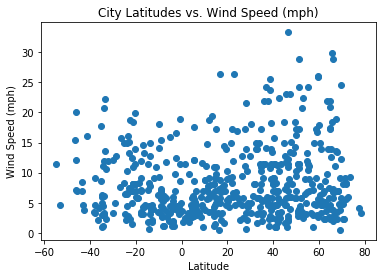

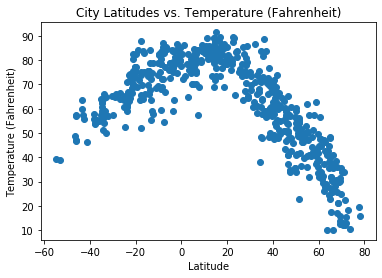

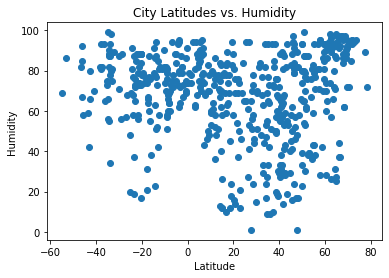

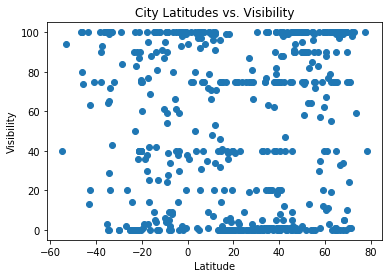

<Figure size 432x288 with 0 Axes>

In [38]:
#since all plots are latitude vs x variable, can use a simple for loop to generate plots and sav as png
for variable in weather.columns[4:8]:
    plt.scatter(weather.Latitude, weather[variable])
    plt.xlabel('Latitude')
    plt.ylabel(f'{variable}')
    plt.title(f'City Latitudes vs. {variable}')
    plt.show()
    plt.savefig(f'Plot - City Latitudes vs {variable}')

## Linear Regression

In [39]:
#Northern hemisphere is any rows with latitude >=0 degrees
north_mask = weather.Latitude >= 0 
north = weather.loc[north_mask]
north

,City,Country,Latitude,Longitude,Wind Speed (mph),Temperature (Fahrenheit),Humidity,Visibility,Pressure
0,georgetown,MY,5.41,100.34,5.57,80.11,94,20,1010
1,kapaa,US,22.08,-159.32,17.22,78.53,69,75,1022
3,bilma,NE,18.69,12.92,14.36,84.92,12,0,1009
4,barrow,US,71.29,-156.79,9.17,12.20,85,1,1025
5,issia,CI,6.49,-6.59,2.91,75.31,91,100,1011
...,...,...,...,...,...,...,...,...,...
540,tabuk,PH,17.42,121.44,6.73,85.28,64,36,1012
541,kunashak,RU,55.70,61.55,11.18,32.00,77,0,1023
542,adilcevaz,TR,38.80,42.73,4.70,50.00,57,40,1016
543,hun,LY,29.13,15.95,4.92,64.45,46,0,1017


In [40]:
#Southern hemisphere is any rows with latitude <0 degrees
south_mask = weather.Latitude < 0 
south = weather.loc[south_mask]
south

,City,Country,Latitude,Longitude,Wind Speed (mph),Temperature (Fahrenheit),Humidity,Visibility,Pressure
2,rikitea,PF,-23.12,-134.97,15.14,73.89,73,100,1016
6,mahebourg,MU,-20.41,57.70,8.05,75.20,88,40,1017
8,poya,NC,-21.35,165.15,10.89,75.60,82,100,1013
9,atuona,PF,-9.80,-139.03,18.12,81.86,74,6,1011
10,vaini,TO,-21.20,-175.20,8.05,82.40,74,40,1014
...,...,...,...,...,...,...,...,...,...
532,san matias,BO,-16.37,-58.40,4.21,75.24,55,69,1012
533,san carlos de bariloche,AR,-41.15,-71.31,16.11,46.40,70,75,1012
534,tucuma,BR,-0.18,-50.05,4.94,77.47,91,38,1012
539,sola,VU,-13.88,167.55,7.72,78.80,94,90,1012


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is 0.15.  The r-squared value is 0.02.


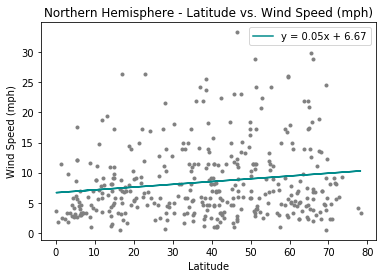

The correlation coefficient is -0.89.  The r-squared value is 0.79.


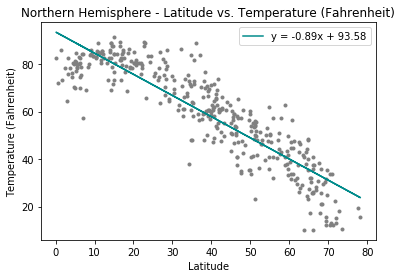

The correlation coefficient is 0.16.  The r-squared value is 0.02.


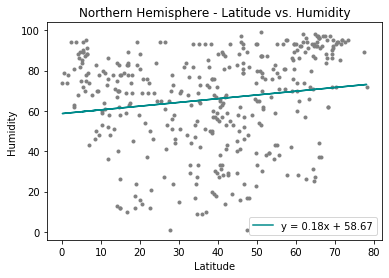

The correlation coefficient is 0.14.  The r-squared value is 0.02.


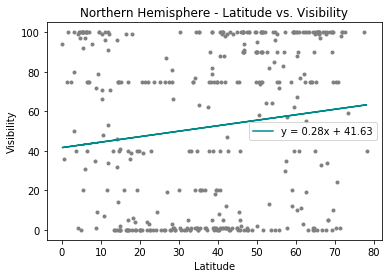

<Figure size 432x288 with 0 Axes>

In [47]:
#Since it's all latitude vs x variable, use for loop
for i in north.columns[4:8]:
    
    #linear regression 
    reg = linregress(north.Latitude, north[i])
    
    #print correlation coefficient and r squared value to gauge fit of regresssion and trend
    print(f'The correlation coefficient is {round(reg.rvalue,2)}.  The r-squared value is {round(reg.rvalue**2,2)}.')
    
    
    #expected values per regression
    regress_values = north.Latitude * reg.slope + reg.intercept
    
    #line equation 
    line_eq = "y = " + str(round(reg.slope,2)) + "x + " + str(round(reg.intercept,2))
    
    #plot 
    plt.scatter(north.Latitude, north[i], marker = '.', color = 'grey')
    plt.xlabel('Latitude')
    plt.ylabel(f'{i}')
    plt.title(f'Northern Hemisphere - Latitude vs. {i}')
    
    #issue with for loop and using annotate is that equation is fixed at a point - either can change axes to 
    #be the same OR can set label for regression line to be the equation and then insert legend with best location
    plt.plot(north.Latitude,regress_values,"darkcyan", label = line_eq)
    plt.legend(loc='best')
    
    #show and save 
    plt.show()
    plt.savefig(f'Northern Hemisphere - Latitude vs. {i}.png')

In [42]:
reg

LinregressResult(slope=0.2769886931800529, intercept=41.628665581252, rvalue=0.1368935733264975, pvalue=0.007532264050337005, stderr=0.10309204681708113)

The correlation coefficient is -0.17.  The r-squared value is 0.03.


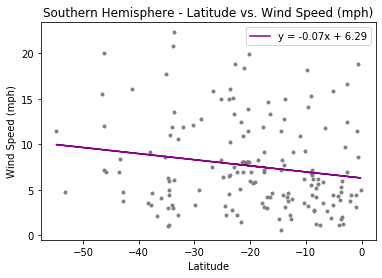

The correlation coefficient is 0.77.  The r-squared value is 0.59.


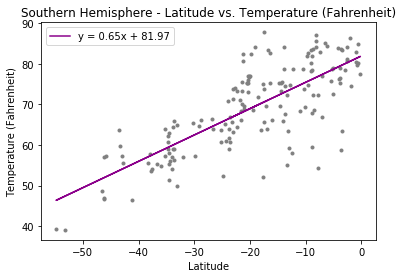

The correlation coefficient is 0.0.  The r-squared value is 0.0.


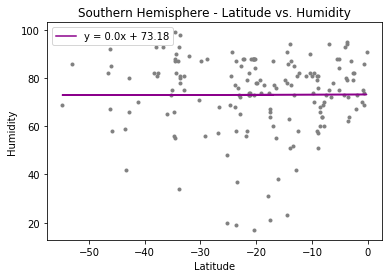

The correlation coefficient is -0.11.  The r-squared value is 0.01.


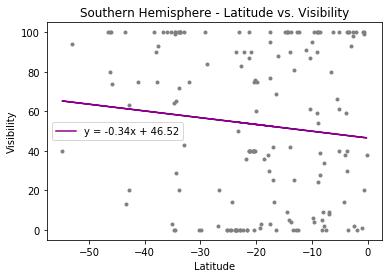

In [48]:
for j in south.columns[4:8]:
    
    #regression 
    reg_s = linregress(south.Latitude, south[j])
    regress_values_s = south.Latitude * reg_s.slope + reg_s.intercept
    line_eq_s = "y = " + str(round(reg_s.slope,2)) + "x + " + str(round(reg_s.intercept,2))
    
    #correlation coefficient and r-squared
    print(f'The correlation coefficient is {round(reg_s.rvalue,2)}.  The r-squared value is '
          f'{round(reg_s.rvalue**2,2)}.')
    
    #plot
    plt.scatter(south.Latitude, south[j], color = 'grey', marker = '.')
    plt.plot(south.Latitude,regress_values_s,color = 'darkmagenta', label = line_eq_s)
    plt.legend(loc='best')
    plt.xlabel('Latitude')
    plt.ylabel(f'{j}')
    plt.title(f'Southern Hemisphere - Latitude vs. {j}')
    
    #save and show
    plt.savefig(f'Southern Hemisphere - Latitude vs. {j}.png')
    plt.show()

## Takeaways and Misc

* There is a strong positive correlation between latitude and temperature in the southern hemisphere and a strong negative correlation between latitude and temperature in the northern hemisphere. This relationship makes sense since the closer to the equator a country is the more direct sunlight it receives from the sun due to the Earth's tilt on its axis. 

* There is little to no correlation between latitude and wind speend in either hemisphere. This lack of relationship is reasonable since winds blow from high atmospheric pressure areas to low atmospheric pressure areas. Atmospheric pressure is determined by altitude, which isn't heavily influenced by proximity to the equator. However, it is unexpected that there is a weak correlation between pressure and wind speed in both hemispheres. 

* There is little to no correlation between humidity and latitude in either hemisphere, which is interesting. Relative humidity, which is a measure of the amount of water vapor in the air vs the amount of water vapor the air can hold, depends on temperature. Warmer air is able to hold more water so the relative humidity increases so we would expect to see a moderate to strong correlation between humidity and temperature - that isn't the case. 

In [44]:
north.corr()

,Latitude,Longitude,Wind Speed (mph),Temperature (Fahrenheit),Humidity,Visibility,Pressure
Latitude,1.000000,-0.033778,0.153230,-0.890707,0.156219,0.136894,0.160081
Longitude,-0.033778,1.000000,-0.291900,-0.057004,0.216977,0.149972,-0.086411
Wind Speed (mph),0.153230,-0.291900,1.000000,-0.052463,-0.125462,0.065728,-0.027257
Temperature (Fahrenheit),-0.890707,-0.057004,-0.052463,1.000000,-0.331718,-0.209336,-0.225000
Humidity,0.156219,0.216977,-0.125462,-0.331718,1.000000,0.319418,-0.028938
Visibility,0.136894,0.149972,0.065728,-0.209336,0.319418,1.000000,-0.194092
Pressure,0.160081,-0.086411,-0.027257,-0.225000,-0.028938,-0.194092,1.000000


In [45]:
south.corr()

,Latitude,Longitude,Wind Speed (mph),Temperature (Fahrenheit),Humidity,Visibility,Pressure
Latitude,1.000000,-0.002578,-0.173931,0.765725,0.003489,-0.108344,-0.116158
Longitude,-0.002578,1.000000,0.157236,0.084691,-0.138243,0.042969,-0.086528
Wind Speed (mph),-0.173931,0.157236,1.000000,0.041053,-0.070823,0.039161,-0.163199
Temperature (Fahrenheit),0.765725,0.084691,0.041053,1.000000,0.076125,-0.040528,-0.214104
Humidity,0.003489,-0.138243,-0.070823,0.076125,1.000000,0.281718,-0.080931
Visibility,-0.108344,0.042969,0.039161,-0.040528,0.281718,1.000000,-0.184973
Pressure,-0.116158,-0.086528,-0.163199,-0.214104,-0.080931,-0.184973,1.000000


In [60]:
weather.corr()

,Latitude,Longitude,Wind Speed (mph),Temperature (Fahrenheit),Humidity,Visibility,Pressure
Latitude,1.000000,-0.057396,0.108208,-0.575801,-0.051218,0.038580,-0.120838
Longitude,-0.057396,1.000000,-0.172129,-0.014537,0.136367,0.117083,-0.072957
Wind Speed (mph),0.108208,-0.172129,1.000000,-0.052585,-0.123400,0.057953,-0.072910
Temperature (Fahrenheit),-0.575801,-0.014537,-0.052585,1.000000,-0.227791,-0.165726,-0.153771
Humidity,-0.051218,0.136367,-0.123400,-0.227791,1.000000,0.305580,-0.005436
Visibility,0.038580,0.117083,0.057953,-0.165726,0.305580,1.000000,-0.184558
Pressure,-0.120838,-0.072957,-0.072910,-0.153771,-0.005436,-0.184558,1.000000


<BarContainer object of 15 artists>

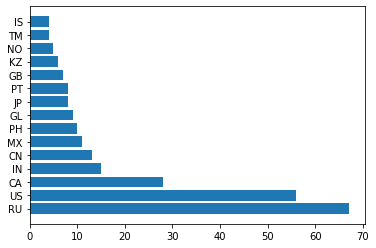

In [77]:
plt.barh(north.Country.value_counts().head(15).index,north.Country.value_counts().head(15).values)

<BarContainer object of 15 artists>

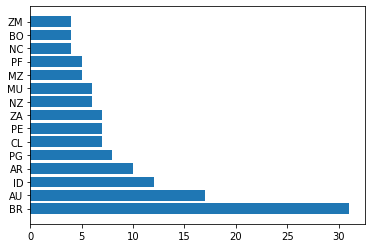

In [78]:
plt.barh(south.Country.value_counts().head(15).index,south.Country.value_counts().head(15).values)